In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Análisis de los datos dentro del parquet.

In [3]:
#Leer el archivo parquet
df = pd.read_parquet('NYC_sonidos.parquet')

#Obtener la cantidad de elementos en el DataFrame
cantidad_elementos = df.size

#Obtener la cantidad de valores nulos por columna
cantidad_nulos_por_columna = df.isnull().sum()

#Obtener el tipo de dato en cada columna
tipos_de_dato_por_columna = df.dtypes

#Obtener una descripción estadística del DataFrame
descripcion_estadistica = df.describe()

#Imprimir los resultados
print("Cantidad de elementos en el DataFrame:", cantidad_elementos)
print("\nCantidad de valores nulos por columna:")
print(cantidad_nulos_por_columna)
print("\nTipo de dato en cada columna:")
print(tipos_de_dato_por_columna)
print("\nDescripción estadística del DataFrame:")
print(descripcion_estadistica)

Cantidad de elementos en el DataFrame: 408702

Cantidad de valores nulos por columna:
Barrio                               0
small_sounding_engine_presence       0
medium_sounding_engine_presence      0
large_sounding_engine_presence       0
engine_of_uncertain_size_presence    0
engine_presence                      0
fecha                                0
dtype: int64

Tipo de dato en cada columna:
Barrio                               object
small_sounding_engine_presence        int64
medium_sounding_engine_presence       int64
large_sounding_engine_presence        int64
engine_of_uncertain_size_presence     int64
engine_presence                       int64
fecha                                object
dtype: object

Descripción estadística del DataFrame:
       small_sounding_engine_presence  medium_sounding_engine_presence  \
count                    58386.000000                     58386.000000   
mean                         0.035334                         0.115559   
std          

Histograma para poder empezar a entender los datos que se encuentran dentro del parquet y poder ver el comportamiento del ruido en la ciudad de New York.

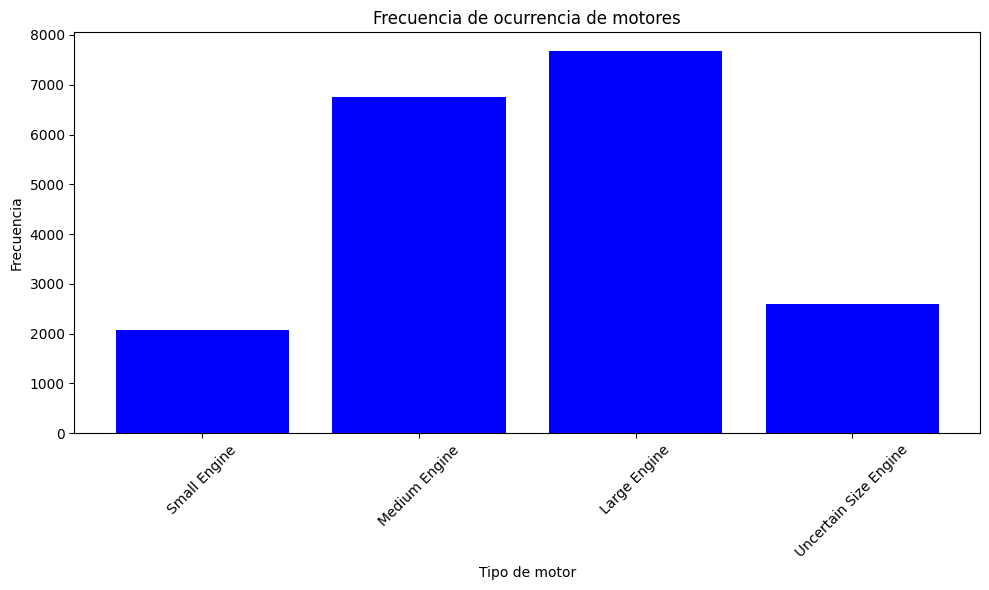

In [4]:
#Calcular la frecuencia de ocurrencia de cada tipo de motor
freq_small_engine = df['small_sounding_engine_presence'].sum()
freq_medium_engine = df['medium_sounding_engine_presence'].sum()
freq_large_engine = df['large_sounding_engine_presence'].sum()
freq_uncertain_engine = df['engine_of_uncertain_size_presence'].sum()

#Crear un gráfico de barras
plt.figure(figsize=(10, 6))

#Etiquetas de los tipos de motor
labels = ['Small Engine', 'Medium Engine', 'Large Engine', 'Uncertain Size Engine']

#Frecuencias de ocurrencia de los tipos de motor
frequencies = [freq_small_engine, freq_medium_engine, freq_large_engine, freq_uncertain_engine]

#Graficar
plt.bar(labels, frequencies, color='blue')

#Añadir título y etiquetas
plt.title('Frecuencia de ocurrencia de motores')
plt.xlabel('Tipo de motor')
plt.ylabel('Frecuencia')

#Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como primera aproximación, se puede observar que los vehículos con motores grandes son los más comunes en la ciudad de Nueva York, seguidos por los de tamaño mediano, lo que indica una clara predominancia de estos sobre los motores pequeños.

Se procede a realizar un grafico de lineas para poder entender si existe alguna tendencia en el ruido de la cual podamos inferir algun comportamiento en el tiempo.

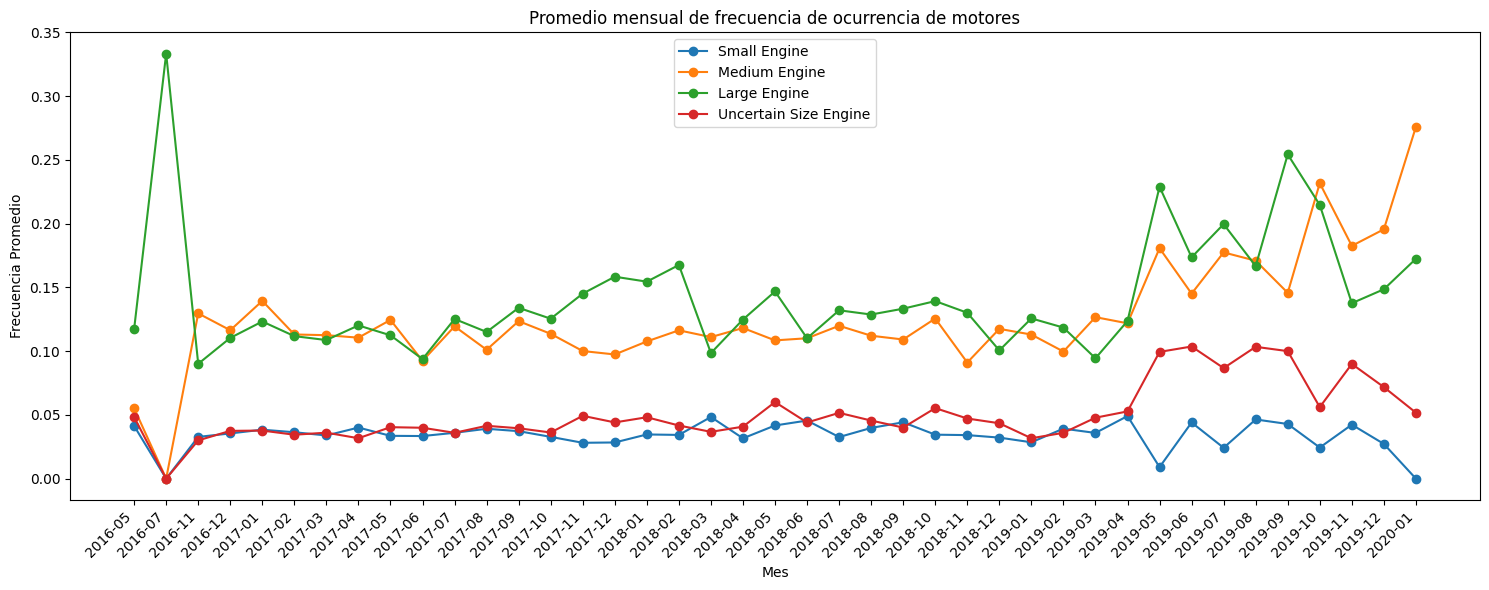

In [5]:
#Convertir la columna 'fecha' a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

#Agregar una nueva columna para el mes
df['mes'] = df['fecha'].dt.to_period('M')

#Calcular el promedio mensual de la frecuencia de ocurrencia de cada tipo de motor
avg_freq_small_engine = df.groupby('mes')['small_sounding_engine_presence'].mean()
avg_freq_medium_engine = df.groupby('mes')['medium_sounding_engine_presence'].mean()
avg_freq_large_engine = df.groupby('mes')['large_sounding_engine_presence'].mean()
avg_freq_uncertain_engine = df.groupby('mes')['engine_of_uncertain_size_presence'].mean()

#Crear un gráfico de líneas
plt.figure(figsize=(15, 6))

#Graficar el promedio mensual de la frecuencia de ocurrencia de cada tipo de motor
plt.plot(avg_freq_small_engine.index.astype(str), avg_freq_small_engine, label='Small Engine', marker='o')
plt.plot(avg_freq_medium_engine.index.astype(str), avg_freq_medium_engine, label='Medium Engine', marker='o')
plt.plot(avg_freq_large_engine.index.astype(str), avg_freq_large_engine, label='Large Engine', marker='o')
plt.plot(avg_freq_uncertain_engine.index.astype(str), avg_freq_uncertain_engine, label='Uncertain Size Engine', marker='o')

#Añadir título y etiquetas
plt.title('Promedio mensual de frecuencia de ocurrencia de motores')
plt.xlabel('Mes')
plt.ylabel('Frecuencia Promedio')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Ajustar la rotación y alineación de las etiquetas del eje x
plt.tight_layout()
plt.show()

El gráfico de líneas proporciona una visualización clara y concisa del comportamiento de los ruidos emitidos por vehículos en la ciudad de Nueva York a lo largo del tiempo. Observamos que la frecuencia promedio de ocurrencia de los diferentes tipos de motores varía mensualmente, lo que sugiere fluctuaciones en la actividad vehicular y posiblemente en los patrones de tráfico en la ciudad. Este análisis nos ayuda a comprender mejor la dinámica del ruido urbano y puede ser útil para identificar tendencias a lo largo del tiempo y desarrollar estrategias efectivas para la gestión del ruido en áreas urbanas.

Cantidad de ruido por barrio.

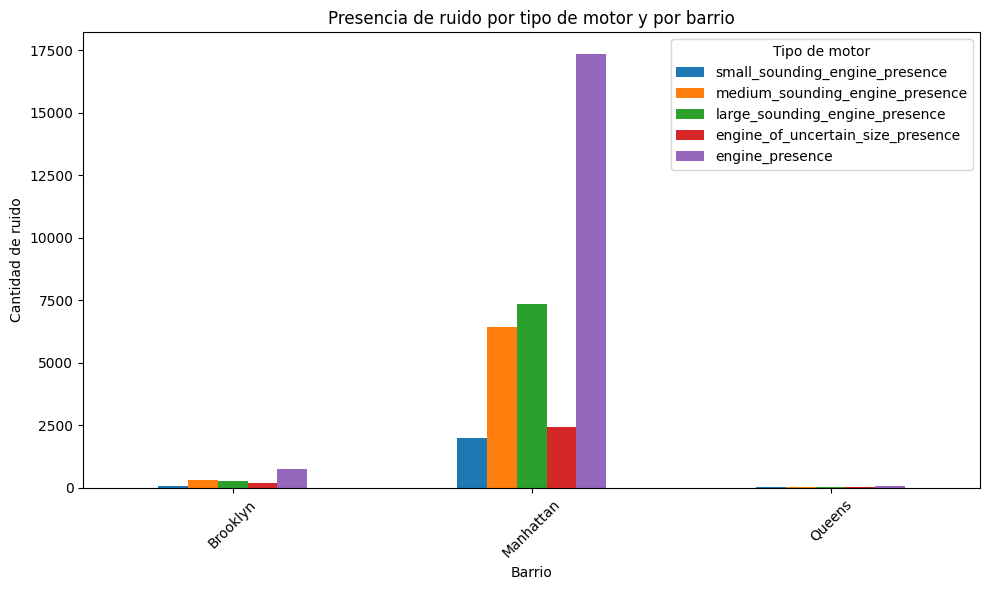

In [10]:
#Leer el archivo parquet
df = pd.read_parquet('NYC_sonidos.parquet')

#Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[['Barrio'] + list(numeric_columns)]

#Agrupar por barrio y sumar la presencia de ruido por tipo de motor
noise_by_neighborhood = df_numeric.groupby('Barrio').sum()

#Crear el gráfico de barras
noise_by_neighborhood.plot(kind='bar', figsize=(10, 6))
plt.title('Presencia de ruido por tipo de motor y por barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de ruido')
plt.legend(title='Tipo de motor')
plt.xticks(rotation=45)  # Rotación de las etiquetas en el eje x
plt.tight_layout()  # Ajustar el diseño para mostrar todas las etiquetas
plt.show()

Como era de esperarse, la mayor concentración de ruido ocurre en Manhattan, ya que en este barrio el tráfico vehicular es realmente intenso.
Como consecuencia de lo obtenido, se plantea invertir en vehículos con tecnologías menos ruidosas que no atenten contra el espacio sonoro, para que así el impacto ambiental sea menor y se pueda progresar en buenos términos la calidad de vida en entornos urbanos.